In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

0. dataset retrieval +
integer encoding for the column that specifies the gender.'M' is labelled as 2, 'F' as 0 and 'I' as 1 +
split data into X[input features] and Y[class label]

In [ ]:
data = pd.read_csv("abalone.csv")
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
X = data.iloc[:,0:8]
Y = data.iloc[:,8:9]

In [ ]:
print("Input attributes: ")
print(X)

print("")
print("class labels:")
print(Y)

Input attributes: 
      sex  length  diameter  height  wholewt  shuckedwt  viscerawt  shellwt
0       2   0.455     0.365   0.095   0.5140     0.2245     0.1010   0.1500
1       2   0.350     0.265   0.090   0.2255     0.0995     0.0485   0.0700
2       0   0.530     0.420   0.135   0.6770     0.2565     0.1415   0.2100
3       2   0.440     0.365   0.125   0.5160     0.2155     0.1140   0.1550
4       1   0.330     0.255   0.080   0.2050     0.0895     0.0395   0.0550
...   ...     ...       ...     ...      ...        ...        ...      ...
4172    0   0.565     0.450   0.165   0.8870     0.3700     0.2390   0.2490
4173    2   0.590     0.440   0.135   0.9660     0.4390     0.2145   0.2605
4174    2   0.600     0.475   0.205   1.1760     0.5255     0.2875   0.3080
4175    0   0.625     0.485   0.150   1.0945     0.5310     0.2610   0.2960
4176    2   0.710     0.555   0.195   1.9485     0.9455     0.3765   0.4950

[4177 rows x 8 columns]

class labels:
      rings
0        15
1    

1. Visualizing data through histograms

1.1 none of the attributes have missing/null values

In [ ]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]

sex          0.0
length       0.0
diameter     0.0
height       0.0
wholewt      0.0
shuckedwt    0.0
viscerawt    0.0
shellwt      0.0
rings        0.0
dtype: float64

1.2 height attribute has some outliers which can be observed from the histogram as well as the box plot for height.

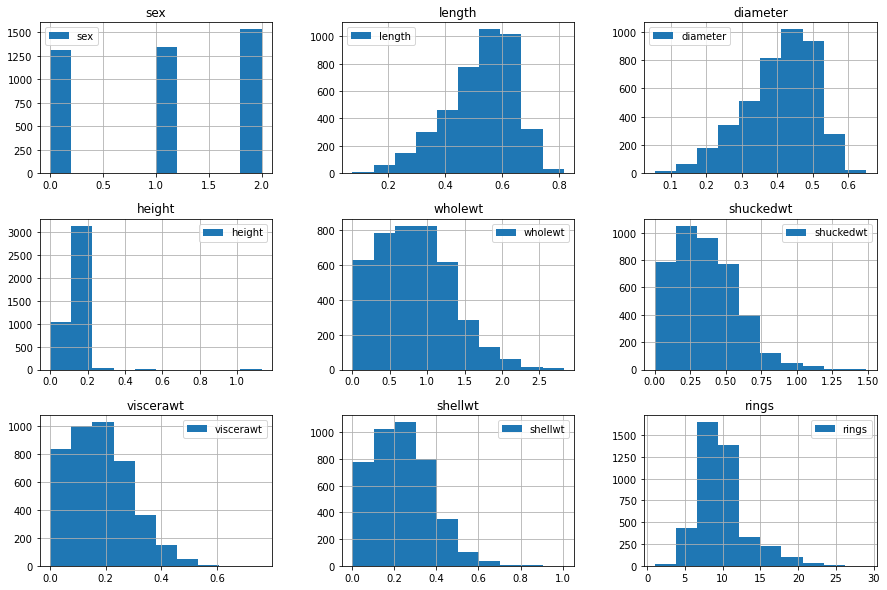

In [ ]:
hist = data.hist(figsize=[15,10],legend=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


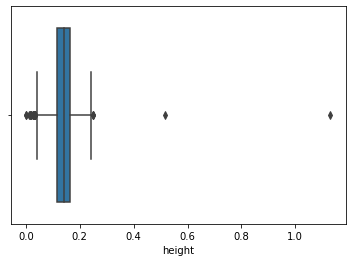

In [ ]:
import seaborn as sns
sns.boxplot(data['height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


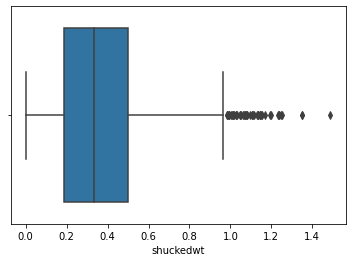

In [ ]:
sns.boxplot(data['shuckedwt'])

2. train-validation-test split [80-10-10] + k=5 fold cross validation on train-validation split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
#test_size = 0.1 as need to have 90% train-validation size and 10% test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train_val = X_train
Y_train_val = Y_train
xtrain = X_train_val.copy()
#test_size=0.1/0.9 as need to have 10% validation set size and 80% train set size
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1/0.9)

kfold = KFold(n_splits=5)
kfold.get_n_splits(X_train_val)
models_dict = {}
i = 1
for train_index, test_index in kfold.split(X_train_val):
  train_dict = {}
  val_dict = {}
  #print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
  y_train, y_test = Y_train_val.iloc[train_index], Y_train_val.iloc[test_index]
  train_dict['X'] = x_train
  train_dict['Y'] = y_train
  val_dict['X'] = x_test
  val_dict['Y'] = y_test
  mdict = {}
  mdict['train'] = train_dict
  mdict['val'] = val_dict
  models_dict[i] = mdict
  i += 1

In [ ]:
#structure of models_dict : key-<model_number>, value-dict1
#structure of dict1 : key-<'train'/'val'>, value-dict2
#structure of dict2 : key-<'X','Y'>, value-dataframe containing either the input attributes or the class labels
models_dict

{1: {'train': {'X':       sex  length  diameter  height  wholewt  shuckedwt  viscerawt  shellwt
   923     1   0.425     0.340   0.100   0.3820     0.1640     0.0960   0.1000
   240     2   0.565     0.425   0.160   0.9425     0.3495     0.2185   0.2750
   1733    2   0.665     0.500   0.175   1.2975     0.6075     0.3140   0.3150
   670     2   0.475     0.385   0.145   0.6175     0.2350     0.1080   0.2150
   3377    1   0.255     0.190   0.070   0.0815     0.0280     0.0160   0.0310
   ...   ...     ...       ...     ...      ...        ...        ...      ...
   1033    2   0.650     0.525   0.185   1.6220     0.6645     0.3225   0.4770
   3264    0   0.655     0.500   0.140   1.1705     0.5405     0.3175   0.2850
   1653    2   0.595     0.450   0.145   0.9590     0.4630     0.2065   0.2535
   2607    0   0.625     0.490   0.165   1.1270     0.4770     0.2365   0.3185
   2732    1   0.410     0.325   0.110   0.3260     0.1325     0.0750   0.1010
   
   [3007 rows x 8 columns], 'Y'

3. Normalize training data and testing data
Feature normalization is done after k-fold cross validaton, on each fold separately, to avoid data leakage. Feature normalization for test set is done on the parameters obtained after doing feature normalization on the train set.
Need to normalize features for each fold and not normalize the features globally [before splitting data into train/test data] as this introduces data leakage ie we unknowningly provide knowledge about the test input attributes (which must be kept hidden) in the form of max/min

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
for i in range(1,6):
  train_x = models_dict[i]['train']['X'].copy()
  val_x = models_dict[i]['val']['X'].copy()

  norm = MinMaxScaler().fit(train_x[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']])
  train_x[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']] = norm.transform(train_x[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']])
  val_x[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']] = norm.transform(val_x[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']])

  models_dict[i]['train']['X'] = train_x;
  models_dict[i]['val']['X'] = val_x

norm1 = MinMaxScaler().fit(xtrain[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']])
X_test[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']] = norm1.transform(X_test[['sex','length','diameter','height','wholewt','shuckedwt','viscerawt','shellwt']])


4. Implementation of Linear Regression from scratch

4.1 Linear regression function

In [ ]:
import math

In [ ]:
def linearReg(x,y):
  #initializing weight vector [which has the same size as the #input attributes]
  w = np.zeros((x.shape[1],1))
  #weights are updated maxNumIters times
  maxNumIters = 10000
  stepsize = 0.0001
  n = x.shape[0]
  #rmse stores the rmse observed at each iteration
  rmse = np.zeros((maxNumIters,1))
  for iter in range(0,maxNumIters):
    #fx is f(x,w) = w0 + x1w1 +... + x8w8 [as there are 8 input attributes]
    fx = np.dot(x,w)
    #loss vector is y - f(x,w)
    loss = y - fx
    #print(loss)
    #weighted loss is the sum over all training data, loss weighted by xi
    weightedLoss = np.dot(x.T,loss)
    #print(weightedLoss)
    #update weights in proportion to stepsize
    w += stepsize * weightedLoss
    #append the rmse [calculated as the sqrt of the average of sum over all training data, (y-f(x,w))^2 ]to rmse vector
    rmse[iter] = math.sqrt(np.sum(loss ** 2)/n)
  return w,rmse

[PART A]

4.2 Getting the best model +  reporting rmse for validation sets for all models

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#bestModel stores the optimal weights obtained from 'linearReg' method for the best model
#bmind stores the index for the best model
#rmses holds the rmse array obtained from 'linearReg' method for all models

#an additional input feature[intercept term] is added to all the inputs. This input feature contains all 1s and is used to calculate the weight w0.
#this leads to reduced rmse as for linear regression without regularization, for model-1 without w0 leads to rmse of 2.38,
#however, using w0 lead to rmse of 2.32. Similarly, for linear regression with l1 regularization, for model-1 without w0 leads to
#rmse of 2.39 and using w0 lead to rmse of 2.32

bestModel = 0
bmind = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].copy()
  x.insert(0, "xnot", np.ones((x.shape[0],1)), True)
  x = x.to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()

  weights,rmse = linearReg(x,y)

  #rmse - plot
  rmses.append(rmse)

  #weights - predict val
  x_val = models_dict[i]['val']['X'].copy()
  x_val.insert(0, "xnot", np.ones((x_val.shape[0],1)), True)
  x_val = x_val.to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  predicted_y = np.dot(x_val,weights)
  mse_val = mean_squared_error(y_val, predicted_y)
  rmse_val = math.sqrt(mse_val)
  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel = weights
    bmind = i

RMSE for validation set for model-1 : 2.321413886849454
RMSE for validation set for model-2 : 2.1646895176967162
RMSE for validation set for model-3 : 2.1089217403542295
RMSE for validation set for model-4 : 2.269712396740298
RMSE for validation set for model-5 : 2.4289074333866183


In [ ]:
print("Best model : model "+str(bmind))

Best model : model 3


4.3 Plotting iteration vs RMSE for all models

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Iteration vs RMSE for model-1')

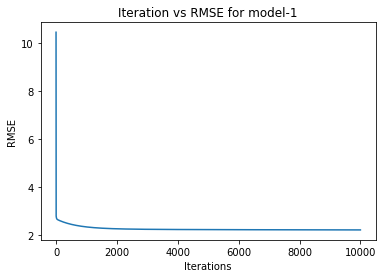

In [ ]:
#model-1
plt.plot(np.arange(1,10001),rmses[0])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-1')

Text(0.5, 1.0, 'Iteration vs RMSE for model-2')

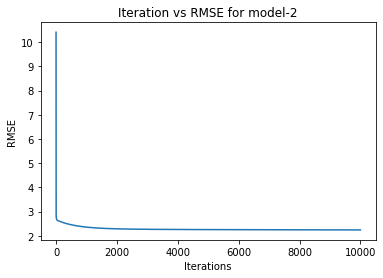

In [ ]:
plt.plot(np.arange(1,10001),rmses[1])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-2')

Text(0.5, 1.0, 'Iteration vs RMSE for model-3')

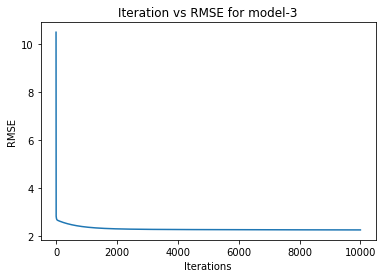

In [ ]:
plt.plot(np.arange(1,10001),rmses[2])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-3')

Text(0.5, 1.0, 'Iteration vs RMSE for model-4')

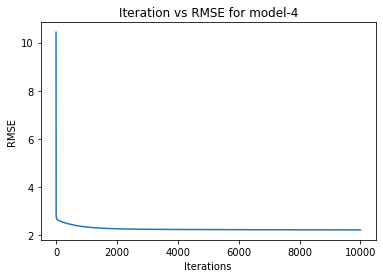

In [ ]:
plt.plot(np.arange(1,10001),rmses[3])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-4')

Text(0.5, 1.0, 'Iteration vs RMSE for model-5')

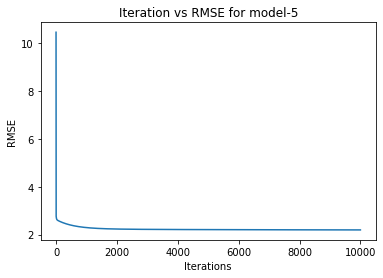

In [ ]:
plt.plot(np.arange(1,10001),rmses[4])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-5')

[PART B]

5. Implementation of Linear Regression with L1 regularization from scratch

5.1 Linear regression with L1 regularization function

In [ ]:
def linearReg_Lasso(x,y,lam):
  #lamvect is the column vector filled with lam [regularization parameter]
  lamvect = lam*np.ones((x.shape[1],1))
  #initializing weight vector [which has the same size as the #input attributes]
  w = np.zeros((x.shape[1],1))
  #weights are updated maxNumIters times
  maxNumIters = 10000
  stepsize = 0.0001
  n = x.shape[0]
  #rmse stores the rmse observed at each iteration
  rmse = np.zeros((maxNumIters,1))
  for iter in range(0,maxNumIters):
    #fx is f(x,w) = w0 + x1w1 +... + x8w8 [as there are 8 input attributes]
    fx = np.dot(x,w)
    #loss vector is y - f(x,w)
    loss = y - fx
    #print(loss)
    #weighted loss is the sum over all training data, loss weighted by xi
    weightedLoss = np.dot(x.T,loss)
    #print(weightedLoss)
    #update weights
    #regularization term for lasso is simply lambda*norm1(weights). Update rule for weight wi would be updated
    #to include the derivative of regularization term which would be lambda
    w += (stepsize*weightedLoss) - lamvect
    #append the rmse [calculated as the sqrt of the average of {sum over all training data, (y-f(x,w)+regularization term)^2} ]to rmse vector
    #regularization term - 0.5*lam*sum over all |wi|
    rmse[iter] = math.sqrt((np.sum(loss ** 2) + (0.5*lam*sum(np.abs(w))))/n)
  return w,rmse

5.2 Getting the best model + reporting rmse for validation sets for all models

In [ ]:
bmind_l = 0
bestModel_Lasso = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].copy()
  x.insert(0, "xnot", np.ones((x.shape[0],1)), True)
  x = x.to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()

  weights,rmse = linearReg_Lasso(x,y,0.001)

  #rmse - plot
  rmses.append(rmse)

  #weights - predict val
  x_val = models_dict[i]['val']['X'].copy()
  x_val.insert(0, "xnot", np.ones((x_val.shape[0],1)), True)
  x_val = x_val.to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  predicted_y = np.dot(x_val,weights)
  mse_val = mean_squared_error(y_val, predicted_y)
  rmse_val = math.sqrt(mse_val)
  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel_Lasso = weights
    bmind_l = i

RMSE for validation set for model-1 : 2.328045795783498
RMSE for validation set for model-2 : 2.172324230983159
RMSE for validation set for model-3 : 2.112669175779243
RMSE for validation set for model-4 : 2.2740063484326503
RMSE for validation set for model-5 : 2.3894503106119798


In [ ]:
print("Best model : model "+str(bmind_l))

Best model : model 3


5.3 Plotting iteration vs RMSE for all models

Text(0.5, 1.0, 'Iteration vs RMSE for model-1')

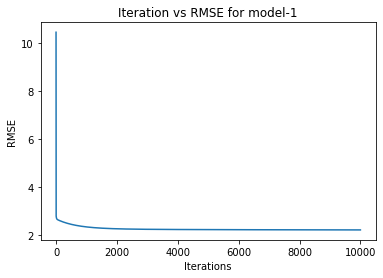

In [ ]:
plt.plot(np.arange(1,10001),rmses[0])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-1')

Text(0.5, 1.0, 'Iteration vs RMSE for model-2')

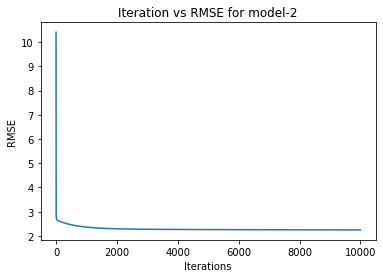

In [ ]:
plt.plot(np.arange(1,10001),rmses[1])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-2')

Text(0.5, 1.0, 'Iteration vs RMSE for model-3')

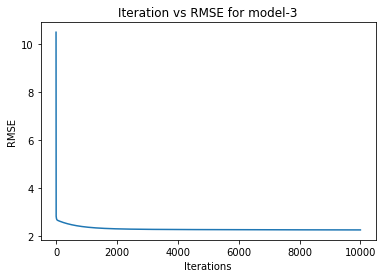

In [ ]:
plt.plot(np.arange(1,10001),rmses[2])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-3')

Text(0.5, 1.0, 'Iteration vs RMSE for model-4')

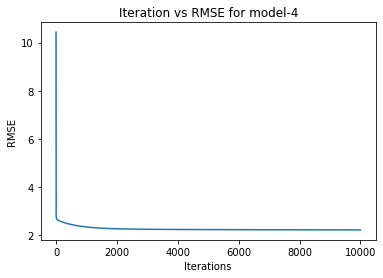

In [ ]:
plt.plot(np.arange(1,10001),rmses[3])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-4')

Text(0.5, 1.0, 'Iteration vs RMSE for model-5')

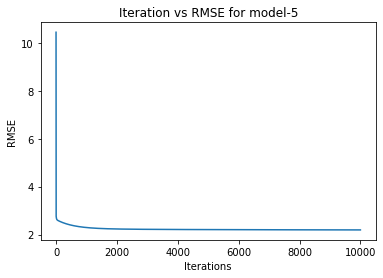

In [ ]:
plt.plot(np.arange(1,10001),rmses[4])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-5')

6. Implementation of Linear Regression with L2 regularization from scratch

6.1 Linear Regression with L2 regularization function

In [ ]:
def linearReg_Ridge(x,y,lam):
  #initializing weight vector [which has the same size as the #input attributes]
  w = np.zeros((x.shape[1],1))
  #weights are updated maxNumIters times
  maxNumIters = 10000
  stepsize = 0.0001
  n = x.shape[0]
  #rmse stores the rmse observed at each iteration
  rmse = np.zeros((maxNumIters,1))
  for iter in range(0,maxNumIters):
    #fx is f(x,w) = w0 + x1w1 +... + x8w8 [as there are 8 input attributes]
    fx = np.dot(x,w)
    #loss vector is y - f(x,w)
    loss = y - fx
    #print(loss)
    #weighted loss is the sum over all training data, loss weighted by xi
    weightedLoss = np.dot(x.T,loss)
    #print(weightedLoss)
    #update weights
    #regularization term for ridge is simply lambda*norm2(weights). Update rule for weight wi would be updated
    #to include the derivative of regularization term which would be lambda*wi
    w += (stepsize*weightedLoss) - lam*w
    #append the rmse [calculated as the sqrt of the average of {sum over all training data, (y-f(x,w)+regularization term)^2} ]to rmse vector
    #regularization term - 0.5*lam*sum over all wi^2
    rmse[iter] = math.sqrt((np.sum(loss ** 2) + (0.5*lam*sum(np.power(w,2))))/n)
  return w,rmse

6.2 Getting the best model + reporting rmse for validation sets for all models

In [ ]:
bmind_r = 0
bestModel_Ridge = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].copy()
  x.insert(0, "xnot", np.ones((x.shape[0],1)), True)
  x = x.to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()

  weights,rmse = linearReg_Ridge(x,y,0.001)

  #rmse - plot
  rmses.append(rmse)

  #weights - predict val
  x_val = models_dict[i]['val']['X'].copy()
  x_val.insert(0, "xnot", np.ones((x_val.shape[0],1)), True)
  x_val = x_val.to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  predicted_y = np.dot(x_val,weights)
  mse_val = mean_squared_error(y_val, predicted_y)
  rmse_val = math.sqrt(mse_val)
  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel_Ridge = weights
    bmind_r = i

RMSE for validation set for model-1 : 2.4381940962680724
RMSE for validation set for model-2 : 2.3770138905452582
RMSE for validation set for model-3 : 2.2811795566688184
RMSE for validation set for model-4 : 2.421164332202717
RMSE for validation set for model-5 : 2.447163684255495


In [ ]:
print("Best model : model "+str(bmind_r))

Best model : model 3


6.3 Plotting iteration vs RMSE for all models

Text(0.5, 1.0, 'Iteration vs RMSE for model-1')

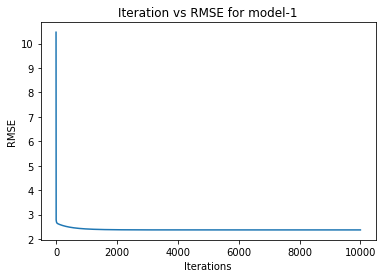

In [ ]:
plt.plot(np.arange(1,10001),rmses[0])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-1')

Text(0.5, 1.0, 'Iteration vs RMSE for model-2')

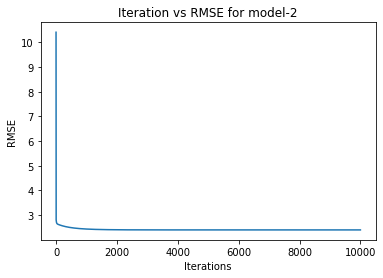

In [ ]:
plt.plot(np.arange(1,10001),rmses[1])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-2')

Text(0.5, 1.0, 'Iteration vs RMSE for model-3')

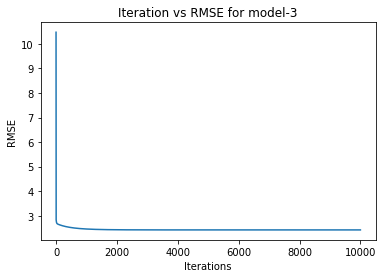

In [ ]:
plt.plot(np.arange(1,10001),rmses[2])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-3')

Text(0.5, 1.0, 'Iteration vs RMSE for model-4')

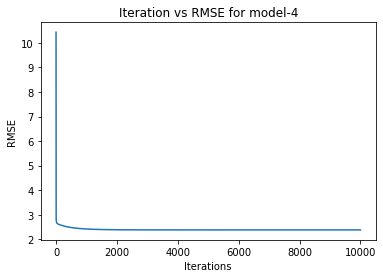

In [ ]:
plt.plot(np.arange(1,10001),rmses[3])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-4')

Text(0.5, 1.0, 'Iteration vs RMSE for model-5')

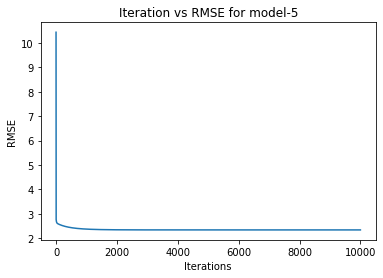

In [ ]:
plt.plot(np.arange(1,10001),rmses[4])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Iteration vs RMSE for model-5')

[PART C]

7. RMSE of best models on test set

In [ ]:
x = X_test.copy()
x.insert(0, "xnot", np.ones((x.shape[0],1)), True)
x = x.to_numpy()
y = Y_test.to_numpy()

#1. LS regression
predicted_y = np.dot(x,bestModel)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression without regularization, rmse : "+str(rmse_val))

#2. lasso regression
predicted_y = np.dot(x,bestModel_Lasso)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression with l1 regularization, rmse : "+str(rmse_val))

#3. ridge regression
predicted_y = np.dot(x,bestModel_Ridge)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression with l2 regularization, rmse : "+str(rmse_val))

Linear regression without regularization, rmse : 2.5904728733737
Linear regression with l1 regularization, rmse : 2.5904728733737
Linear regression with l2 regularization, rmse : 2.4199945689023705


[PART D]

8. Scikit-learn’s implementation of Linear Regression [without regularization, with l1 regularization, with l2 regularization]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

8.1 Linear regression without regularization + get best model

In [ ]:
bestModel = 0
bmind = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()
  x_val = models_dict[i]['val']['X'].to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  reg = LinearRegression().fit(x, y)

  y_pred_slr= reg.predict(x_val)
  mse_val = mean_squared_error(y_val, y_pred_slr)
  rmse_val = math.sqrt(mse_val)

  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel = weights
    bmind = i

RMSE for validation set for model-1 : 2.301742759984893
RMSE for validation set for model-2 : 2.15830613123047
RMSE for validation set for model-3 : 2.0801463966243907
RMSE for validation set for model-4 : 2.2577330537177467
RMSE for validation set for model-5 : 2.4203139079625386


In [ ]:
print("Best model : model "+str(bmind))

Best model : model 3


8.2 Linear regression with l1 regularization + get best model

In [ ]:
bmind_l = 0
bestModel_Lasso = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()
  x_val = models_dict[i]['val']['X'].to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  reg = Lasso(alpha=0.001).fit(x, y)

  y_pred_slr= reg.predict(x_val)
  mse_val = mean_squared_error(y_val, y_pred_slr)
  rmse_val = math.sqrt(mse_val)

  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel_Lasso = weights
    bmind_l = i

RMSE for validation set for model-1 : 2.3074844738969893
RMSE for validation set for model-2 : 2.159390801609756
RMSE for validation set for model-3 : 2.0884761329681325
RMSE for validation set for model-4 : 2.259516516426314
RMSE for validation set for model-5 : 2.4048223196889564


In [ ]:
print("Best model : model "+str(bmind_l))

Best model : model 3


8.3 Linear regression with l2 regularization + get best model

In [ ]:
bmind_r = 0
bestModel_Ridge = 0
leastrmse = math.inf
rmses = []
for i in range(1,6):
  x = models_dict[i]['train']['X'].to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()
  x_val = models_dict[i]['val']['X'].to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  reg = Ridge(alpha=0.001).fit(x, y)

  y_pred_slr= reg.predict(x_val)
  mse_val = mean_squared_error(y_val, y_pred_slr)
  rmse_val = math.sqrt(mse_val)

  print("RMSE for validation set for model-"+str(i)+" : "+str(rmse_val))
  if (rmse_val<leastrmse):
    leastrmse = rmse_val
    bestModel_Ridge = weights
    bmind_r = i

RMSE for validation set for model-1 : 2.3017640319892987
RMSE for validation set for model-2 : 2.158253561203903
RMSE for validation set for model-3 : 2.0801802721010243
RMSE for validation set for model-4 : 2.257731530196783
RMSE for validation set for model-5 : 2.420262827214332


In [ ]:
print("Best model : model "+str(bmind_r))

Best model : model 3


8.4 RMSE of best models on test set

In [ ]:
x = X_test.to_numpy()
y = Y_test.to_numpy()

#1. LS regression
xt = models_dict[bmind]['train']['X'].to_numpy()
yt = models_dict[bmind]['train']['Y'].to_numpy()

reg = LinearRegression().fit(xt, yt)
predicted_y = reg.predict(x)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression without regularization, rmse : "+str(rmse_val))


#2. lasso regression
xt = models_dict[bmind_l]['train']['X'].to_numpy()
yt = models_dict[bmind_l]['train']['Y'].to_numpy()

reg = Lasso(alpha=0.001).fit(xt, yt)
predicted_y = reg.predict(x)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression with l1 regularization, rmse : "+str(rmse_val))

#3. ridge regression
xt = models_dict[bmind_r]['train']['X'].to_numpy()
yt = models_dict[bmind_r]['train']['Y'].to_numpy()

reg = Ridge(alpha=0.001).fit(xt, yt)
predicted_y = reg.predict(x)
mse_val = mean_squared_error(y, predicted_y)
rmse_val = math.sqrt(mse_val)
print("Linear regression with l2 regularization, rmse : "+str(rmse_val))


Linear regression without regularization, rmse : 2.2396063974693305
Linear regression with l1 regularization, rmse : 2.2432906937949193
Linear regression with l2 regularization, rmse : 2.23958601109524


[PART E]

9. Normal equations

In [ ]:
for i in range(1,6):
  x = models_dict[i]['train']['X'].to_numpy()
  y = models_dict[i]['train']['Y'].to_numpy()
  x_val = models_dict[i]['val']['X'].to_numpy()
  y_val = models_dict[i]['val']['Y'].to_numpy()

  weights = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

  predicted_y = np.dot(x_val,weights)
  mse_val = mean_squared_error(y_val, predicted_y)
  rmse_val = math.sqrt(mse_val)
  print("Linear regression for model "+str(i)+" has rmse : "+str(rmse_val) + " on validation set")

Linear regression for model 1 has rmse : 2.3568587588297283 on validation set
Linear regression for model 2 has rmse : 2.245940117399337 on validation set
Linear regression for model 3 has rmse : 2.124304877778099 on validation set
Linear regression for model 4 has rmse : 2.332422463360453 on validation set
Linear regression for model 5 has rmse : 2.6280803216377233 on validation set
